# Setup

In [1]:
import ccfrag
from pathlib import Path

# Creating queries for ColabFold

In [2]:
# this is the fasta file that contains the sequence we want to model piece-wise
path_input_fasta = Path('SPIKE_SARS.fasta')

# this is where the sub-strings, the models, and the results will be stored
path_output = Path('CCfrag_constructs_SPIKE_SARS')

# this is a safety flag; the program will fail if the folders already do exist (defaults to 'False')
# it is useful to set it to 'True' to run this notebook with its pre-existing data
overwrite = True

In [3]:
for win_len, overlap in [[70, 35], [50,25], [30,15], [20,10]]:
	for nmer in [2,3,4]:
		divider = ccfrag.Divider(L=win_len, O=overlap, nmer=nmer)
		divider.generate_queries(path_input_fasta, path_output,
                                 format='single_line_fasta', overwrite=overwrite)

>SPIKE_SARS sp|P59594|Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus OX=694009 GN=S PE=1 SV=1
>SPIKE_SARS sp|P59594|Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus OX=694009 GN=S PE=1 SV=1
>SPIKE_SARS sp|P59594|Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus OX=694009 GN=S PE=1 SV=1
>SPIKE_SARS sp|P59594|Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus OX=694009 GN=S PE=1 SV=1
>SPIKE_SARS sp|P59594|Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus OX=694009 GN=S PE=1 SV=1
>SPIKE_SARS sp|P59594|Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus OX=694009 GN=S PE=1 SV=1
>SPIKE_SARS sp|P59594|Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus OX=694009 GN=S PE=1 SV=1
>SPIKE_SARS sp|P59594|Spike glycoprotein OS=Severe acute respiratory syndrome coronavirus OX=694009 GN=S PE=1 SV=1
>SPIKE_SARS sp|P59594|Spike glycoprotein OS=Severe acute respiratory syndrome co

# Running ColabFold_batch

In [4]:
%%bash

cd CCfrag_constructs_SPIKE_SARS/SPIKE_SARS/
ROOT_FOLDER=$(pwd)

for i in $(ls -d */)
do
    echo $i
    cd $ROOT_FOLDER
    cd $i

# this line will predict models for all the FASTA files inside the 'queries' folder,
# and output the resulting files to the 'predictions' folder
    colabfold_batch queries predictions --num-recycle=5

done

2_20_10/
2_30_15/
2_50_25/
2_70_35/
3_20_10/
3_30_15/
3_50_25/
3_70_35/
4_20_10/
4_30_15/
4_50_25/
4_70_35/


In [5]:
!du -h -d 1 | grep CCfrag

1,2G	./CCfrag_constructs_SPIKE_SARS


# Analyzing data with CCfrag integrator

In [6]:
import matplotlib.pyplot as plt

In [7]:
integrator = ccfrag.Integrator(path_fragments='CCfrag_constructs_SPIKE_SARS/SPIKE_SARS',
                               list_features=['plddt', 'para', 'kih', 'pae', 'heli'],
                               data_output='DATA_CCfrag.csv')

In [8]:
list_specifications, full_sequence, df_data_sequence = integrator.run_assembly_analysis()

Commencing analysis of SPIKE_SARS ...
SPIKE_SARS read as a sequence of length 1255
Found 12 specification folders:
* 2_20_10/
* 2_30_15/
* 2_50_25/
* 2_70_35/
* 3_20_10/
* 3_30_15/
* 3_50_25/
* 3_70_35/
* 4_20_10/
* 4_30_15/
* 4_50_25/
* 4_70_35/


In [9]:
df_data_sequence

,residue_name,residue_number,2_20_10_plddt,2_20_10_para,2_20_10_kih,2_20_10_pae,2_20_10_heli,2_30_15_plddt,2_30_15_para,2_30_15_kih,...,4_50_25_plddt,4_50_25_para,4_50_25_kih,4_50_25_pae,4_50_25_heli,4_70_35_plddt,4_70_35_para,4_70_35_kih,4_70_35_pae,4_70_35_heli
0,M,0,60.905,1.0,0.0,12.028825,0.0,50.250,1.0,0.0,...,30.0275,0.0,0.0,24.082642,0.0,28.1325,1.0,0.0,23.678350,0.0
1,F,1,64.215,1.0,0.0,12.028825,1.0,52.280,1.0,0.0,...,30.3675,0.0,0.0,24.082642,0.0,29.2125,1.0,0.0,23.678350,0.0
2,I,2,58.735,1.0,0.0,12.028825,1.0,50.655,1.0,0.0,...,29.8600,0.0,0.0,24.082642,0.0,28.2475,1.0,0.0,23.678350,0.0
3,F,3,65.590,1.0,0.0,12.028825,1.0,50.750,1.0,0.0,...,29.3750,0.0,0.0,24.082642,0.0,26.5350,1.0,0.0,23.678350,0.0
4,L,4,66.220,1.0,0.0,12.028825,1.0,49.795,1.0,0.0,...,29.2625,0.0,0.0,24.082642,0.0,23.1875,1.0,0.0,23.678350,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,K,1250,42.175,1.0,0.0,13.498162,0.0,54.950,1.0,0.0,...,29.3500,1.0,0.0,21.583842,0.0,17.8525,1.0,0.0,21.374173,0.0
1251,L,1251,43.515,1.0,0.0,13.498162,0.0,54.890,1.0,0.0,...,29.8575,1.0,0.0,21.583842,0.0,15.1725,1.0,0.0,21.374173,0.0
1252,H,1252,40.060,1.0,0.0,13.498162,0.0,55.000,1.0,0.0,...,27.6725,1.0,0.0,21.583842,0.0,14.6650,1.0,0.0,21.374173,0.0
1253,Y,1253,42.735,1.0,0.0,13.498162,0.0,54.550,1.0,0.0,...,27.2900,1.0,0.0,21.583842,0.0,14.5525,1.0,0.0,21.374173,0.0


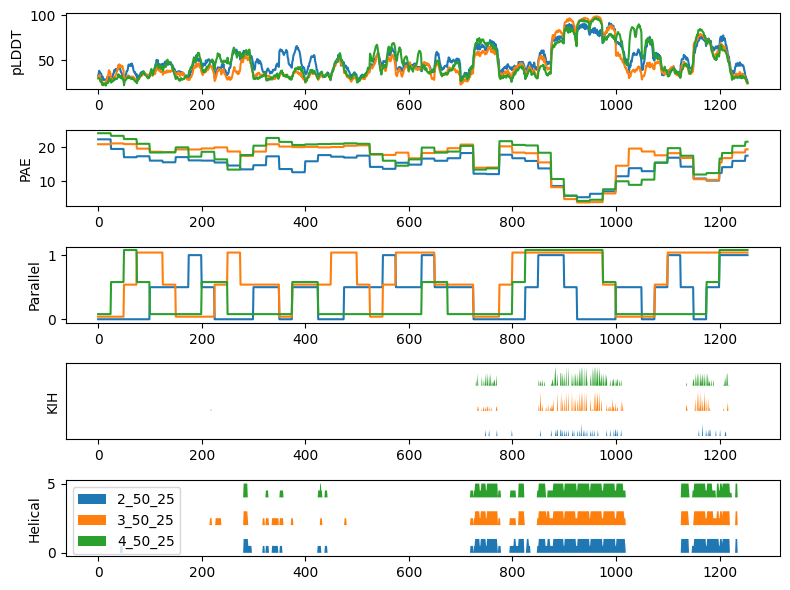

In [10]:
list_specifications = [i.replace('/','') for i in list_specifications if '_50_' in i]

fig, axarr = plt.subplots(nrows=5, ncols=1, figsize=(8,6))

for i_spec, specification in enumerate(list_specifications):
    axarr[0].plot(df_data_sequence[f'{specification}_plddt'], label=specification)
    axarr[1].plot(df_data_sequence[f'{specification}_pae'], label=specification)
    axarr[2].plot(df_data_sequence[f'{specification}_para']+0.04*i_spec, label=specification)
    kih_data = df_data_sequence[f'{specification}_kih'].to_numpy()
    # thresholding the data for visualization
    kih_data = np.minimum(kih_data, 1.5)
    axarr[3].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+kih_data, label=specification)
    heli_data = df_data_sequence[f'{specification}_heli']
    axarr[4].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+heli_data, label=specification)
        
    axarr[0].set_ylabel('pLDDT')
    axarr[1].set_ylabel('PAE')
    axarr[2].set_ylabel('Parallel')
    axarr[3].set_ylabel('KIH')
    axarr[3].set_yticks([])
    axarr[4].set_ylabel('Helical')
    

plt.legend(loc='upper left')
plt.tight_layout()